<a href="https://colab.research.google.com/github/pccalegari/exemplos-CN/blob/main/Unidade2_Raizes_parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Equações Algébricas

Nesta unidade vamos estudar métodos numéricos para determinar os zeros (ou raízes) de funções.

Dada uma função $f(x)$ definida e contínua em um intervalo aberto $I$, chamaremos de zero ou raiz desta função no intervalo $I$ a todo $\alpha\in \mathbb{R}$ tal que $f(\alpha)=0$.

**Motivação:**

Nas mais diversas áreas ocorrem situações que envolvem a resolução de uma equação da forma $f(x)=0$. Burden e Faires [1] apresentam o seguinte problema de motivação. O crescimento de uma população isolada, em um curto período de tempo, é modelado pela EDO,

$$\left\{\begin{array}{ll}
\dfrac{dN(t)}{dt}&=\lambda N(t), t\in [t_0,t_F],\\
N(t_0)&=N_0,
\end{array}\right .$$

sendo $N(t)$ a população no tempo $t$ e $\lambda$ uma taxa constante de nascimentos. A solução desta equação é $N(t)=N_0e^{\lambda t}$, onde $N_0$ é a população no instante de tempo inicial. Se adicionarmos a este modelo uma taxa constante de imigração $v$, obtemos como solução
$$N(t)=N_0e^{\lambda t}+\dfrac{v}{\lambda}(e^{\lambda t}-1).$$

Suponha que uma certa população, inicialmente tenha $N(0)=1000$ indivíduos e durante um ano $435$ indivíduos migraram para a comunidade e que no final deste a população seja $N(1)=1564$. Para determinar a taxa de nascimento, precisamos resolver a equação

$$1564=1000e^{\lambda}+\dfrac{435}{\lambda}(e^{\lambda}-1),$$


**Problema:** Dada $f(x)$, com $x\in\mathbb{R}$, queremos determinar $\alpha$ tal que $f(\alpha)=0$.

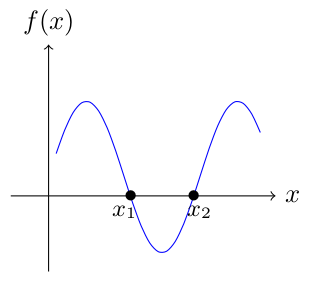

A Figura apresenta o gráfico de uma função $f(x)$ ilustrando $x_1$ e $x_2$ raízes de $f(x)$.

* **Métodos analíticos**: para alguns polinômios.

* **Métodos numéricos:** são métodos iterativos que determinam uma raiz aproximada.

* Cada **processo iterativo** irá calcular uma sequência de aproximações para a solução desejada.

* O cálculo de uma nova aproximação depende de aproximações anteriores. Dessa forma, devemos fornecer as aproximações iniciais que o método exigir.

**Raiz isolada:**

O primeiro passo para determinar a aproximação de uma raiz é determinar um intervalo que contenha apenas uma raiz. Para isso, vamos utilizar o seguinte resultado.

*Teorema de Bolzano:*

Se $f(x)$ é uma função contínua e troca de sinal no intervalo $[a,b]$, ou seja, $f(a)\cdot f(b)< 0$, então existe pelo menos um $\alpha\in [a,b]$ tal que $f(\alpha)=0$.

A Figura a seguir apresenta algumas situações de intervalos que contém a troca de sinal e outra que não contém a troca de sinal, ilustrando o resultado do teorema.

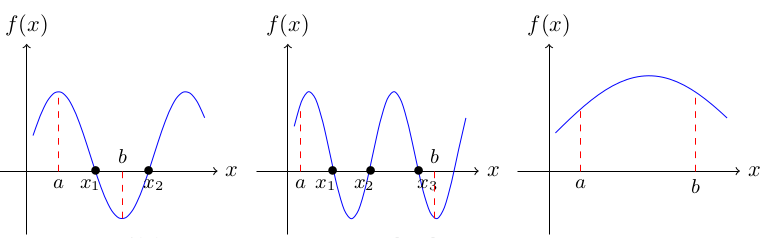

**Obs.** Note que, se $f(x)$ troca de sinal e $f'(x)$ não troca de sinal em $[a,b]$ então $\alpha$ é a única raiz de $f(x)$ no intervalo $[a,b]$.

Assim, o Teorema de Bolzano garante a existência da raiz e o sinal da derivada, garante a unicidade.

*Exemplo 1.* Considere $f(x) = x\ln(x)-3.2$, com $x>0$. Determine um intervalo que contenha uma única raiz.

Primeiro passo, vamos avaliar a função, gerando uma tabela $x|f(x)$, usando três algarismos significativos.

Com base nesta tabela, usando o Teorema de Bolzano, identifique um intervalo que contenha pelo menos uma raiz.

Em seguida, analise o sinal da derivada neste intervalo, para identificar se a função é crescente ou decrescente. Isso garante a unicidade da raiz. Se não for possível garantir, diminua o intervalo.

**Método da Bissecção:**

Considere $f(x)$ contínua e suponha $[a,b]$ um intervalo que contenha uma raiz isolada de $f(x)$. Considere $x_m$ o ponto médio do intervalo $[a,b]$. Como $f(x)$ troca de sinal em $[a,b]$ então $f(x)$ trocará de sinal no intervalo $[a,x_m]$ ou no intervalo $[x_m,b]$. Assim, temos um novo intervalo que contém a raiz e este intervalo tem tamanho $|b-a|/2$.

*Algoritmo.*

Entrada: $f(x)$, $[a,b]$ e $\delta$ (tolerância).
Saída: $\alpha$ (aproximação da raiz de $f(x)$).



```
1.  i = 1, imax = 100
2.  x = (a + b)/2
3.  enquanto( |b-a|/2 > delta e i < imax) faça:
4.     se (f(a)*f(x) > 0) então:
5.        a = x
6.     caso contrário:
7.        b = x
8.     x = (b + a)/2
9.     i = i + 1
10. Escreva x, f(x)       
```

* Embora o método seja simples, ele sofre por ser lento.

* Após $n$ iterações o erro é delimitado por $|b - a|/2^n$.

*Exemplo 2.* Determinar o valor aproximado de $\sqrt{5}$, com erro menor que $0.01$.



**Método da Falsa Posição:**

Dada uma função $f(x)$ e um intervalo $[a,b]$ que contenha uma raiz isolada, a ideia deste método é apresentada na Figura a seguir.

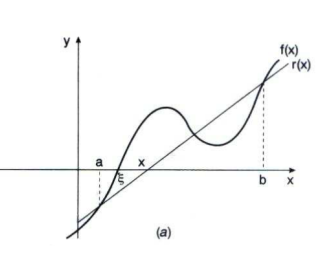

A cada iteração do método, vamos aproximar a raiz de $f(x)$ (representada por $\xi$) pela raiz da reta que passa pelos pontos $(a,f(a))$ e $(b,f(b))$. Assim teremos dois intervalos, $[a,x]$ e $[x,b]$. Escolhemos como intervalo para a próxima iteração aquele que contem a raiz $xi$, ou seja, o intervalo que ocorre a troca de sinal da $f(x)$.

Note que, $x$ raiz da reta que passa pelos pontos $(a,f(a))$ e $(b,f(b))$ é dado por,

$$x = \dfrac{af(b) - bf(a)}{f(b)-f(a)}.$$

*Algoritmo.*

Entrada: $f(x)$, $[a,b]$ e $\delta$ (tolerância).
Saída: $\alpha$ (aproximação da raiz de $f(x)$).



```
1.  i = 1, imax = 100
2.  x = (a*f(b) - b*f(a))/(f(b) - f(a))
3.  enquanto( |f(x)| > delta e i < imax) faça:
4.     se (f(a)*f(x) > 0) então:
5.        a = x
6.     caso contrário:
7.        b = x
8.     x = (a*f(b) - b*f(a))/(f(b) - f(a))
9.     i = i + 1
10. Escreva x, f(x)       
```
* Dependendo do comportamento da função $f(x)$ este método pode ser mais rápido que o método da Bissecção.

*Exemplo 3.* Determinar o valor aproximado de $\sqrt{5}$, com erro menor que $0.01$, usando o método da Falsa Posição.


**Método das Aproximações Sucessivas (Ponto Fixo):**


Uma **função de iteração** (fórmula de recorrência) que aproxima a solução do problema, será aplicada repetidas vezes, a partir de uma aproximação incial, irá gerar uma sequência de aproximações que esperamos convergir para a solução do problema.


Queremos determinar uma função de iteração $\phi(x)$ tal que, a sequência gerada por:

$$x_n=\phi(x_{n-1}),$$
com $i=1,2,\ldots,$ e $x_0$ uma aproximação inicial, seja uma sequência convergente para a raiz $\alpha$ de $f(x)$.

A função de iteração $\phi(x)$ é uma função que tem $\alpha$ como ponto fixo, ou seja, $\phi(\alpha)=\alpha$.

*Como obter $\phi(x)$?*

Reescrevendo a expressão $f(x)=0$ no formato $x=\phi(x)$.

*Exemplo 4.* A função quadrática $f(x)=x^2+0.96x-2.08=0$ possui duas raízes, uma positiva e outra negativa.

(a) Mostre que $f(x)$ possui uma raiz no intervalo $[0,2]$.

(b) Obtenha uma função $\phi(x)$.

(c) Utilize a função obtida no item anterior para obter uma sequência de aproximações para a raiz no intervalo $[0,2]$, partindo de $x_0=1.5$.



**Teorema do Ponto Fixo**

Seja $\alpha$ a raiz de uma função $f(x)$, isolada em um intervalo $I$ e $\phi(x)$ uma função tal que $\alpha=\phi(\alpha)$. Se:
1. $\phi$ e $\phi'$ são contínuas em $I$;
2. $k=\max_{x\in I}|\phi'(x)|< 1$; e,
3. $x_0\in I$ e $x_n=\phi(x_{n-1})\in I$, $n=1,2,3,\ldots,$
então a sequência $x_n$ converge para $\alpha$.

*Demonstração*: Veja a demonstração em [2].

*Exemplo 5.* Determinar uma aproximação para a raiz da função $f(x)=2x-\cos(x)$, no intervalo $[0,\pi/2]$, usando o método das Aproximações Sucessivas.

**Referências**

[1] Burden e Faires. Numerical Analysis. Brook/Cole, 9th edition, 2011.

[2] Flora, et al. Noções de Cálculo Numérico.